## CSCN8010- Foundations of Machine Learning Frameworks
### Lab 9 - Dense Neural Network
### Name:Periyanyagi Christina
### Student ID: 8938218

### Importing Libraries

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


### 1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).

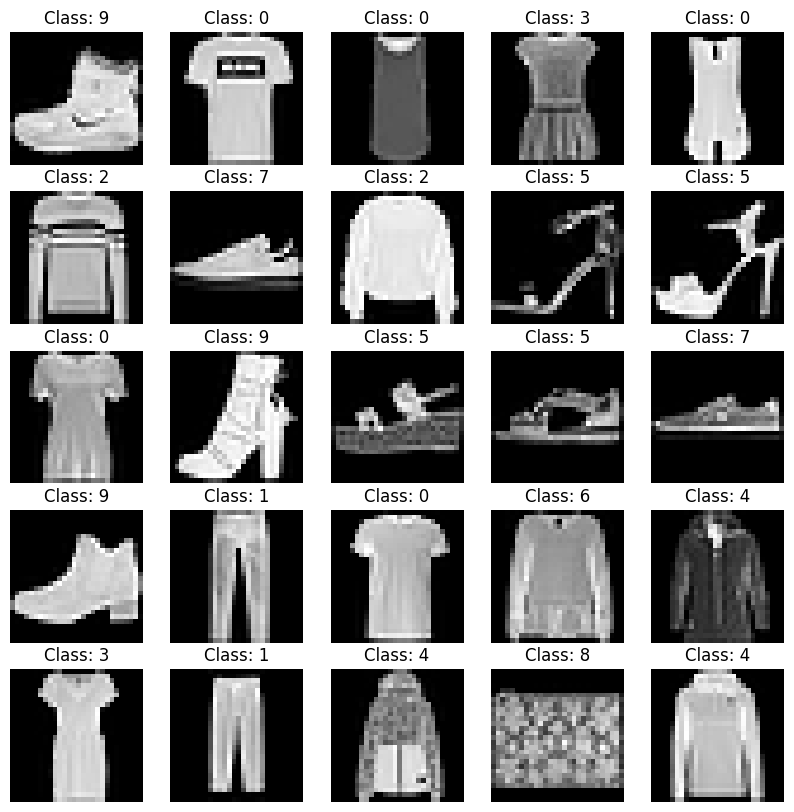

Number of training samples: 60000
Number of testing samples: 10000
Image shape: (28, 28)


In [7]:
# Load the fMNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Display sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Class: {y_train[i]}')
    plt.axis('off')
plt.show()

# Explore dataset properties
print(f"Number of training samples: {x_train.shape[0]}")
print(f"Number of testing samples: {x_test.shape[0]}")
print(f"Image shape: {x_train.shape[1:]}")


### 2. Train a dense neural network using Keras, try out at least three hyperparameters configurations (2 points)

In [8]:
# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Function to create and compile the model
def create_model(hidden_units, activation_func):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(hidden_units, activation=activation_func),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter configurations
configurations = [
    (128, 'relu'),
    (256, 'relu'),
    (128, 'sigmoid')
]

# Train models for each configuration
models = []
for config in configurations:
    model = create_model(*config)
    model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
    models.append(model)

Epoch 1/5
750/750 [==============================] - 13s 16ms/step - loss: 0.5382 - accuracy: 0.8138 - val_loss: 0.4116 - val_accuracy: 0.8544
Epoch 2/5
750/750 [==============================] - 11s 15ms/step - loss: 0.3992 - accuracy: 0.8566 - val_loss: 0.3774 - val_accuracy: 0.8663
Epoch 3/5
750/750 [==============================] - 11s 15ms/step - loss: 0.3561 - accuracy: 0.8727 - val_loss: 0.3614 - val_accuracy: 0.8702
Epoch 4/5
750/750 [==============================] - 11s 15ms/step - loss: 0.3329 - accuracy: 0.8793 - val_loss: 0.3783 - val_accuracy: 0.8636
Epoch 5/5
750/750 [==============================] - 11s 14ms/step - loss: 0.3104 - accuracy: 0.8861 - val_loss: 0.3462 - val_accuracy: 0.8752
Epoch 1/5
750/750 [==============================] - 12s 16ms/step - loss: 0.5230 - accuracy: 0.8174 - val_loss: 0.4268 - val_accuracy: 0.8487
Epoch 2/5
750/750 [==============================] - 11s 15ms/step - loss: 0.3852 - accuracy: 0.8629 - val_loss: 0.3715 - val_accuracy: 0.8655

### 3. Evaluate its accuracy for each of the configurations. Choose the best configuration, and: Report its accuracy, confusion metric, and specific examples of incorrect classification, and drew some conclusions from this exploration (2 points)

313/313 [==============================] - 1s 2ms/step

Configuration 1:
Accuracy: 0.8693
313/313 [==============================] - 1s 3ms/step

Configuration 2:
Accuracy: 0.876
313/313 [==============================] - 1s 2ms/step

Configuration 3:
Accuracy: 0.8647
313/313 [==============================] - 1s 2ms/step

Best Configuration:
Accuracy: 0.876
Confusion Matrix:
[[857   2  13  18   3   0  94   0  13   0]
 [  3 972   1  18   3   0   2   0   1   0]
 [ 16   0 811  11  87   0  73   0   2   0]
 [ 35  19   9 872  33   0  29   0   3   0]
 [  0   1 113  37 788   0  58   0   3   0]
 [  0   0   0   1   0 963   0  11   2  23]
 [159   0  98  27  67   0 633   0  16   0]
 [  0   0   0   0   0  33   0 923   2  42]
 [  3   0   1   3   6   2   5   3 977   0]
 [  0   0   0   0   0   8   1  27   0 964]]


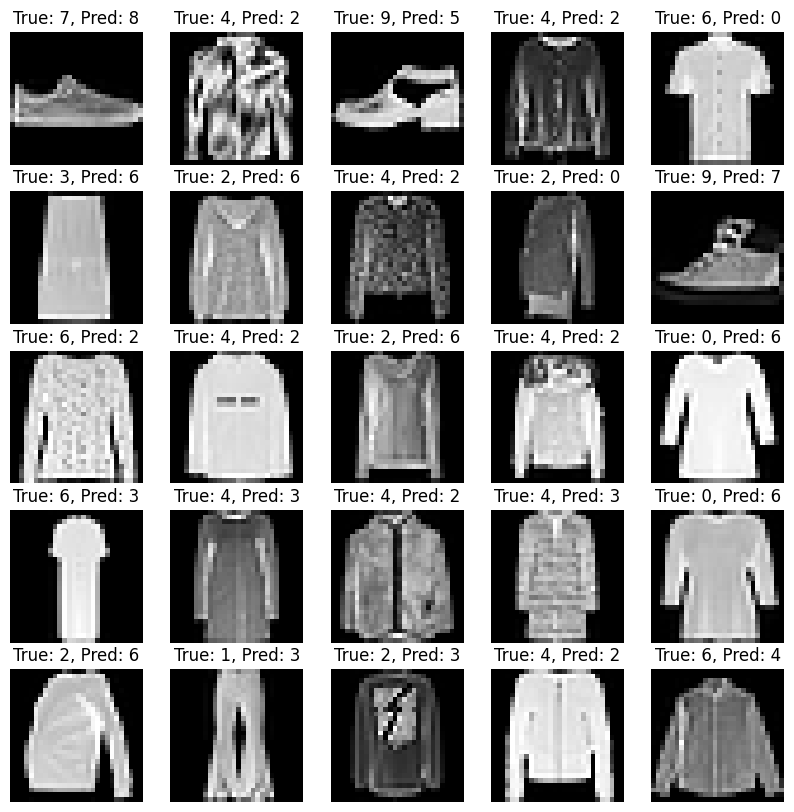

In [9]:
# Evaluate models and choose the best configuration
best_model = None
best_accuracy = 0

for i, model in enumerate(models):
    # Evaluate accuracy
    predictions = model.predict(x_test)
    y_pred = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    
    # Print results for each configuration
    print(f"\nConfiguration {i + 1}:")
    print(f"Accuracy: {accuracy}")

    # Choose the best model based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Evaluate the best model in detail
predictions_best = best_model.predict(x_test)
y_pred_best = np.argmax(predictions_best, axis=1)
y_true = np.argmax(y_test, axis=1)

# Report accuracy, confusion matrix, and examples of incorrect classification
print("\nBest Configuration:")
print(f"Accuracy: {best_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_best))

# Find indices of incorrect classifications
incorrect_indices = np.where(y_pred_best != y_true)[0]

# Display some examples of incorrect classifications
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    idx = incorrect_indices[i]
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'True: {y_true[idx]}, Pred: {y_pred_best[idx]}')
    plt.axis('off')
plt.show()